In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("daily-total-female-births.csv")

In [ ]:
data.tail()
# How many daily births in one year (1959)

,Date,Births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


<Figure size 648x216 with 0 Axes>

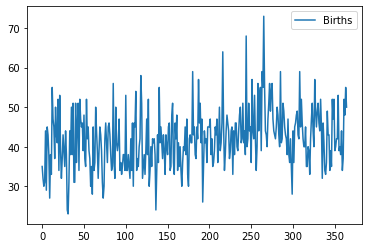

In [ ]:
plt.figure(figsize=(9, 3))
data.plot()
plt.show()

# Moving Averages

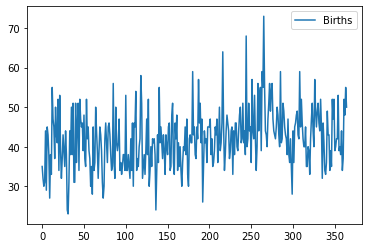

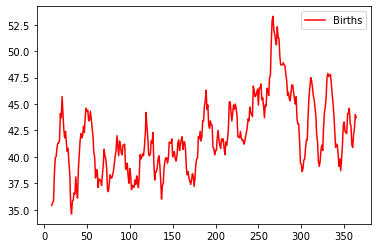

In [ ]:
rolling = data.rolling(window=10) # Step for Moving Averages
rolling_mean = rolling.mean()
# plot original and transformed dataset
data.plot()
rolling_mean.plot(color='red')
plt.show()

In [ ]:
data.index = pd.DatetimeIndex(data["Date"])

In [ ]:
data.drop(["Date"], axis=1, inplace=True)

In [ ]:
data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<AxesSubplot:xlabel='Date'>

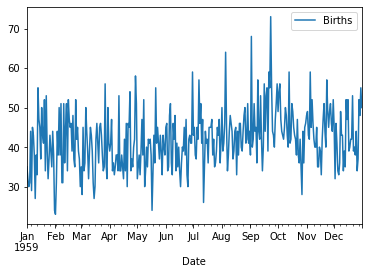

In [ ]:
data.plot()

In [ ]:
data.shape

(365, 1)

In [ ]:
trainData = data.iloc[:300]
testData = data.iloc[300:]

In [ ]:
trainData.shape, testData.shape

((300, 1), (65, 1))

# Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# create class
model = SimpleExpSmoothing(trainData)
# fit model
model_fit = model.fit()

In [ ]:
trainData.tail()

,Births
Date,
1959-10-23,38
1959-10-24,36
1959-10-25,42
1959-10-26,35
1959-10-27,28


In [ ]:
model_fit.summary() 

Dep. Variable:,Births,No. Observations:,300
Model:,SimpleExpSmoothing,SSE,15472.918
Optimized:,True,AIC,1186.919
Trend:,None,BIC,1194.327
Seasonal:,None,AICC,1187.055
Seasonal Periods:,None,Date:,"Sat, 22 May 2021"
Box-Cox:,False,Time:,12:50:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0552279,alpha,True
initial_level,38.589790,l.0,True


In [ ]:
yhat = model_fit.predict(testData.index[0], testData.index[len(testData)-1])
print(yhat)

1959-10-28    43.659332
1959-10-29    43.659332
1959-10-30    43.659332
1959-10-31    43.659332
1959-11-01    43.659332
                ...    
1959-12-27    43.659332
1959-12-28    43.659332
1959-12-29    43.659332
1959-12-30    43.659332
1959-12-31    43.659332
Freq: D, Length: 65, dtype: float64


In [ ]:
testData.shape

(65, 1)

In [ ]:
predictiondf = pd.DataFrame()
predictiondf["original"] = testData.values.reshape(65,)
predictiondf["predictedSES"] = yhat.values

In [ ]:
predictiondf

,original,predictedSES
0,44,43.659332
1,36,43.659332
2,45,43.659332
3,46,43.659332
4,48,43.659332
...,...,...
60,37,43.659332
61,52,43.659332
62,48,43.659332
63,55,43.659332


In [ ]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(testData.values, yhat.values))

6.302026726020474

<Figure size 3600x2160 with 0 Axes>

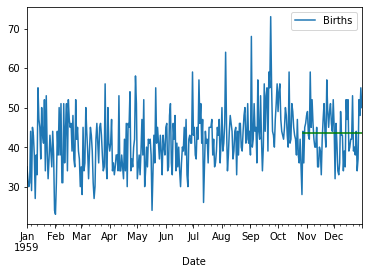

In [ ]:
plt.figure(figsize=(50, 30))
data.plot()
yhat.plot(color='green')
plt.show()

# Holts Winters Methods

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

In [ ]:
holtWinters = ExponentialSmoothing(trainData,
    trend="additive",
    damped_trend=True,
    seasonal="additive",
    initialization_method="estimated",
    seasonal_periods=2,
    use_boxcox=True)

In [ ]:
model_fit = holtWinters.fit()

yhat = model_fit.predict(testData.index[0], testData.index[len(testData)-1])
print(yhat)

1959-10-28    43.568240
1959-10-29    43.582622
1959-10-30    43.568240
1959-10-31    43.582622
1959-11-01    43.568240
                ...    
1959-12-27    43.568240
1959-12-28    43.582622
1959-12-29    43.568240
1959-12-30    43.582622
1959-12-31    43.568240
Freq: D, Length: 65, dtype: float64


<Figure size 3600x2160 with 0 Axes>

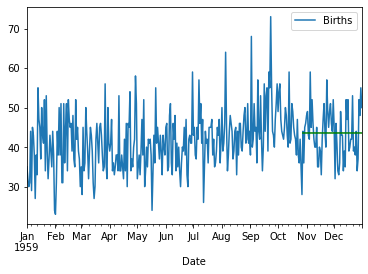

In [ ]:
plt.figure(figsize=(50, 30))
data.plot()
yhat.plot(color='green')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(testData.values, yhat.values))

6.302099463990161

In [ ]:
model_fit.summary()

Dep. Variable:,Births,No. Observations:,300
Model:,ExponentialSmoothing,SSE,15417.762
Optimized:,True,AIC,1195.848
Trend:,Additive,BIC,1221.774
Seasonal:,Additive,AICC,1196.469
Seasonal Periods:,2,Date:,"Sat, 22 May 2021"
Box-Cox:,True,Time:,13:01:02
Box-Cox Coeff.:,0.20716,,
,coeff,code,optimized
smoothing_level,0.0463382,alpha,True
smoothing_trend,3.5384e-14,beta,True


# Holts Method

In [ ]:
holt = Holt(trainData,
    exponential=True,
    damped_trend=True,
    initialization_method="heuristic")

In [ ]:
model_fit = holt.fit()

yhat = model_fit.predict(testData.index[0], testData.index[len(testData)-1])
print(yhat)

1959-10-28    43.841249
1959-10-29    43.841249
1959-10-30    43.841249
1959-10-31    43.841249
1959-11-01    43.841249
                ...    
1959-12-27    43.841249
1959-12-28    43.841249
1959-12-29    43.841249
1959-12-30    43.841249
1959-12-31    43.841249
Freq: D, Length: 65, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(testData.values, yhat.values))

6.305919763839006

In [ ]:
model_fit.summary()

Dep. Variable:,Births,No. Observations:,300
Model:,Holt,SSE,15288.655
Optimized:,True,AIC,1189.325
Trend:,Multiplicative,BIC,1207.844
Seasonal:,None,AICC,1189.709
Seasonal Periods:,None,Date:,"Sat, 22 May 2021"
Box-Cox:,False,Time:,12:59:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0516332,alpha,True
smoothing_trend,0.000000,beta,True
